## Tratamiento de valores atípicos

Un valor atípico o valor extremo (outlier) es un valor el cual es significativamente diferente del resto de los datos. “Un outlier es una observación la cual se desvía tanto del resto de las observaciones que levanta sospechas sobre el mecanismo que lo generó” [D. Hawkins. Identification of Outliers, Chapman and Hall, 1980].

Valores estadísticos como la media y la varianza son susceptibles a los valores extremos. Además, **algunos modelos de Machine Learning son susceptibles a los outliers** lo cual decrece su desempeño. Por lo tanto, dependiendo de cuál algoritmo deseas usar para entrenar un modelo, es muy común que sea necesario remover los valores atípicos de las variables.

Discutimos en la sección 3, cómo identificar los outliers. En esta sección vamos a discutir cómo podemos procesarlos para entrenar nuestros modelos de machine learning o aprendizaje automático. 

Es importante resaltar que con cada modificación que hacemos en nuestros datos, introducimos algún sesgo. Por eso es muy importante saber cuáles son las implicaciones de cada método. Si es una buena decisión o no dependerá de la naturaleza de los datos que estemos analizando.


## Cómo podemos pre-procesar los valores extremos?

- Removerlos: eliminar los valores extremos de nuestro conjunto de datos
- Tratar los outliers como datos faltantes y proceder con cualquiera de las técnicas de sustitución
- Discretización: los datos son discretizados ( ver sección 8) y los valores atípicos son colados en los segmentos extremos junto con los valores más bajos y altos del conjunto de datos
- Truncamiento de valores: Limitar la distribución de la variable a unos valores máximos y mínimos. También se le conoce como codificación Top / Bottom 


**El truncamiento de valores** se conoce en inglés como capping, trimming, censoring o winsorization.


## Truncamiento de outliers.

**Truncar**, significa limitar los valores máximos y/o mínimos de una distribución a un valor arbitrario. En otras palabras, los valores más grandes o más pequeños que los que arbitrariamente se han determinado, son truncados.

Truncar puede hacerse en ambos extremos de la distribución, o solo en un extremo, dependiendo de la variable y el caso de uso.

Puedes ver la charla de Soledad en pydata Londres [pydata](https://www.youtube.com/watch?v=KHGGlozsRtA), donde ella presenta un ejemplo de truncamiento de los valores extremos en una compañía financiera.

Los números en los cuales se debe truncar la distribución pueden ser determinados: 

- arbitrariamente
- usando la regla de proximidad del rango inter-cuartil 
- usando la aproximación gaussiana 
- usando los cuantiles

### Ventajas

- no remueve las observaciones

### Limitaciones

- distorsiona la distribución de las variables 
- distorsiona la relación entre las variable

## En este Demo

Vas a aprender cómo truncar los valores extremos en las variables utilizando cuantiles y el conjunto e datos del Boston House Price

## Importante

Cuando truncamos nuestros datos, tendemos a limitar los valores en el set de entrenamiento y en el set de prueba. Es importante recordar que los valores de truncamiento DEBEN SER derivados del set de entrenamiento. Y luego esos mismos valores se usan para truncar las variables en el set de prueba.

Para simplificar el demo, no lo haremos, pero por favor, ten eso en cuenta cuando construyas tus pipelines de machine learning.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Para la gráficas Q-Q 
import scipy.stats as stats

# boston house dataset 
from sklearn.datasets import load_boston

from feature_engine.outliers import Winsorizer

In [2]:
# Cargar los datos del Boston House price de sklearn
boston_dataset = load_boston()

# crear un dataframe  con las variables independientes
# Usaremos solo 3 variables en este demo
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# añadir el target
boston['MEDV'] = boston_dataset.target

boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [3]:
# Función para crear histograma, gráfico Q-Q y
# gráfico de caja. 
# Esto lo aprendimos en la sección 3 del curso

def diagnostic_plots(df, variable):
    # la función toma un dataframe (df) y
    # la variable de interés como argumento

    # define el tamaño de la gráfica
    plt.figure(figsize=(16, 4))

    # histograma
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # gráfica Q-Q 
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Cuantiles de la variable')

    # gráfico de caja 
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Gráfico de caja')

    plt.show()

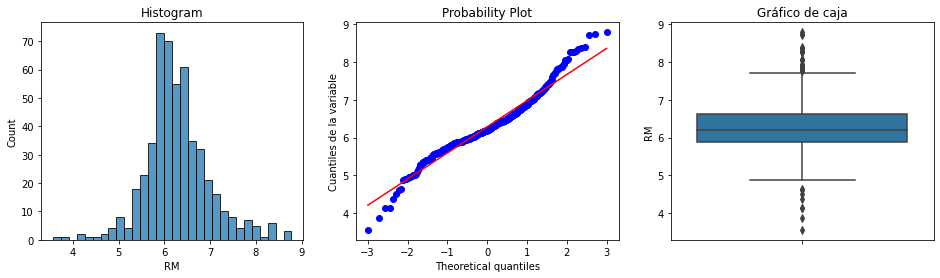

In [4]:
# identifiquemos los valores extremos en la variable RM

diagnostic_plots(boston, 'RM')

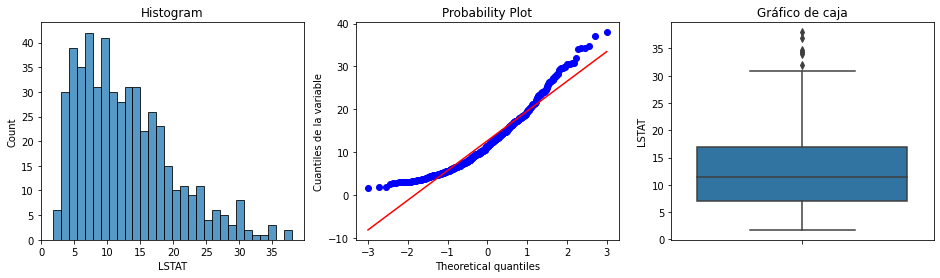

In [5]:
# identifiquemos los valores extremos en la variable LSTAT

diagnostic_plots(boston, 'LSTAT')

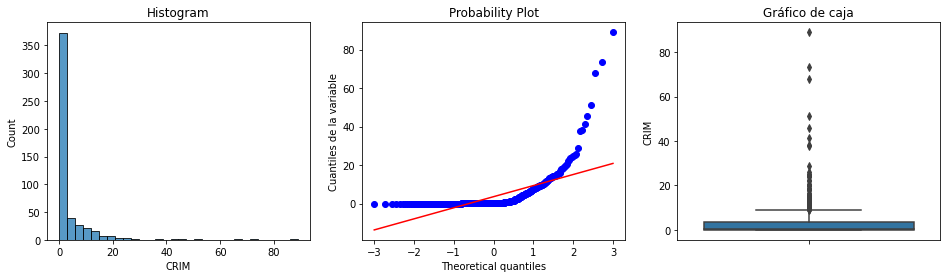

In [6]:
# identifiquemos los valores extremos en la variable CRIM

diagnostic_plots(boston, 'CRIM')

Hay valores extremos presentes en todas las variables. RM tiene outliers en ambos extremos, mientras que LSTAT y CRIM only en el extremo derecho.

Para identificar los outliers, re-utilicemos la funcíon que aprendimos en la sección 3:

In [7]:
def find_boundaries(df, variable):

    # los límites son los cuantiles

    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)

    return upper_boundary, lower_boundary

In [8]:
# encontremos los límites para la variable RM

RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM')
RM_upper_limit, RM_lower_limit

(7.5875, 5.314)

In [9]:
# encontremos los límites para la variable LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_boundaries(boston, 'LSTAT')
LSTAT_upper_limit, LSTAT_lower_limit

(26.8075, 3.7075)

In [10]:
# encontremos los límites para la variable CRIM

CRIM_upper_limit, CRIM_lower_limit = find_boundaries(boston, 'CRIM')
CRIM_upper_limit, CRIM_lower_limit

(15.78915, 0.027909999999999997)

In [11]:
# Ahora reemplacemos los valores extremos de la variable 
# RM por los límites máximo y mínimo

boston['RM']= np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
                       np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

In [12]:
# Ahora reemplacemos los valores extremos de la variable 
# LSTAT por los límites máximo y mínimo

boston['LSTAT']= np.where(boston['LSTAT'] > LSTAT_upper_limit, LSTAT_upper_limit,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, LSTAT_lower_limit, boston['LSTAT']))

In [13]:
# Ahora reemplacemos los valores extremos de la variable 
# CRIM por los límites máximo y mínimo

boston['CRIM']= np.where(boston['CRIM'] > CRIM_upper_limit, CRIM_upper_limit,
                       np.where(boston['CRIM'] < CRIM_lower_limit, CRIM_lower_limit, boston['CRIM']))

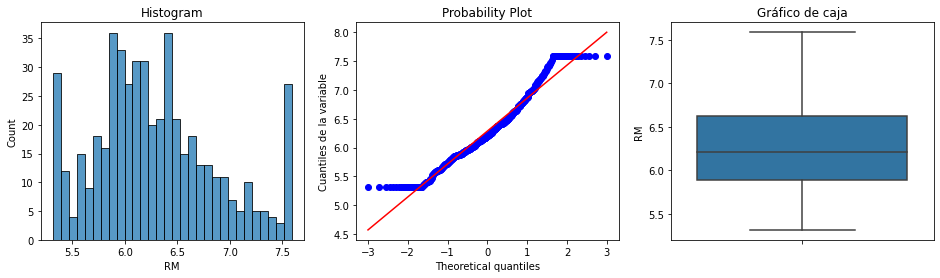

In [14]:
# exploremos los valores extremos en los datos removidos
# para la variable RM vemos muchos menos outliers 
# que en los datos originales

diagnostic_plots(boston, 'RM')

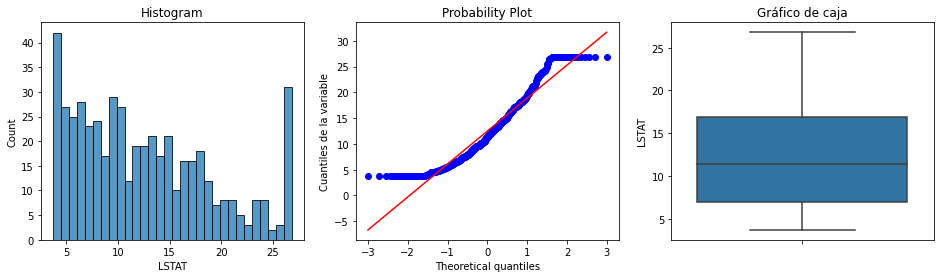

In [15]:
diagnostic_plots(boston, 'LSTAT')

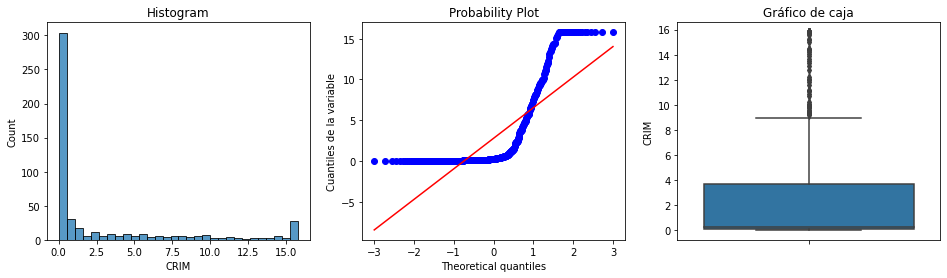

In [16]:
diagnostic_plots(boston, 'CRIM')

Podemos ver que ya no hay outliers, pero la distribución de la variable se ha distorcionado considerablemente.

## Truncamiento con Feature-engine

In [17]:
# Cargar los datos del Boston House price de sklearn
boston_dataset = load_boston()

# crear un dataframe  con las variables independientes
# Usaremos solo 3 variables en este demo
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# añadir el target
boston['MEDV'] = boston_dataset.target

boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


In [18]:
# crear el truncador
windsoriser = Winsorizer(capping_method='quantiles', 
                         # elige 'quantiles' para fijar los límites con cuantiles,
                         # 'skewed' para la regla IQR
                         # o 'gaussian' para la media y std
                          tail='both', # truncar a la izquierda ('left'), 
                         # derecha ('right') o ambos extremos ('both') 
                          fold=0.05,
                          variables=['RM', 'LSTAT', 'CRIM'])


windsoriser.fit(boston)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['RM', 'LSTAT', 'CRIM'])

In [19]:
boston_t = windsoriser.transform(boston)

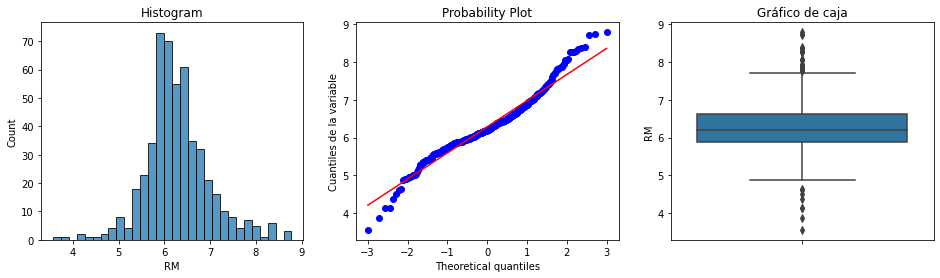

In [20]:
diagnostic_plots(boston, 'RM')

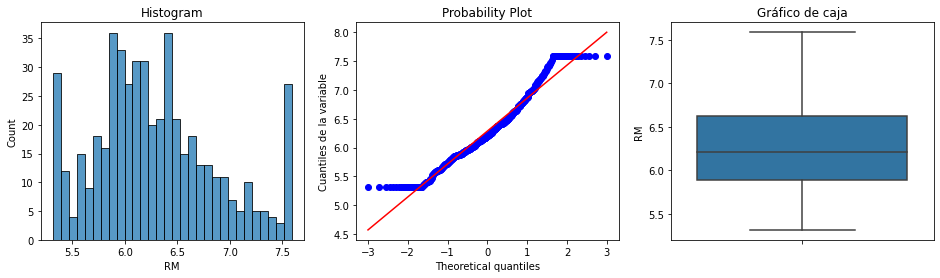

In [21]:
diagnostic_plots(boston_t, 'RM')

In [22]:
# podemos inspeccionar los límites mínimos 
# para truncar cada variable
windsoriser.left_tail_caps_

{'RM': 5.314, 'LSTAT': 3.7075, 'CRIM': 0.027909999999999997}

In [23]:
# podemos inspeccionar los límites máximos 
# para truncar cada variable
windsoriser.right_tail_caps_

{'RM': 7.5875, 'LSTAT': 26.8075, 'CRIM': 15.78915}